In [3]:
import geopandas as gpd
import streamlit as st
from streamlit_image_comparison import image_comparison
import matplotlib.pyplot as plt
import contextily as cx

from matplotlib_scalebar.scalebar import ScaleBar

In [4]:
# load maps
access_score = gpd.read_parquet('./results/hexagons_access.parquet')

In [5]:
access_score.head()

,hex_id,X__index_level_0__,Freq,geometry
0,8b1860868000fff,8b1860868000fff,637,"POLYGON ((-0.42719 49.18807, -0.42748 49.18793..."
1,8b1860868001fff,8b1860868001fff,782,"POLYGON ((-0.42678 49.18771, -0.42707 49.18757..."
2,8b1860868002fff,8b1860868002fff,602,"POLYGON ((-0.42783 49.18803, -0.42812 49.18789..."
3,8b1860868003fff,8b1860868003fff,786,"POLYGON ((-0.42742 49.18767, -0.42771 49.18753..."
4,8b1860868004fff,8b1860868004fff,654,"POLYGON ((-0.42697 49.18847, -0.42725 49.18833..."


In [6]:
local_crs = 2154

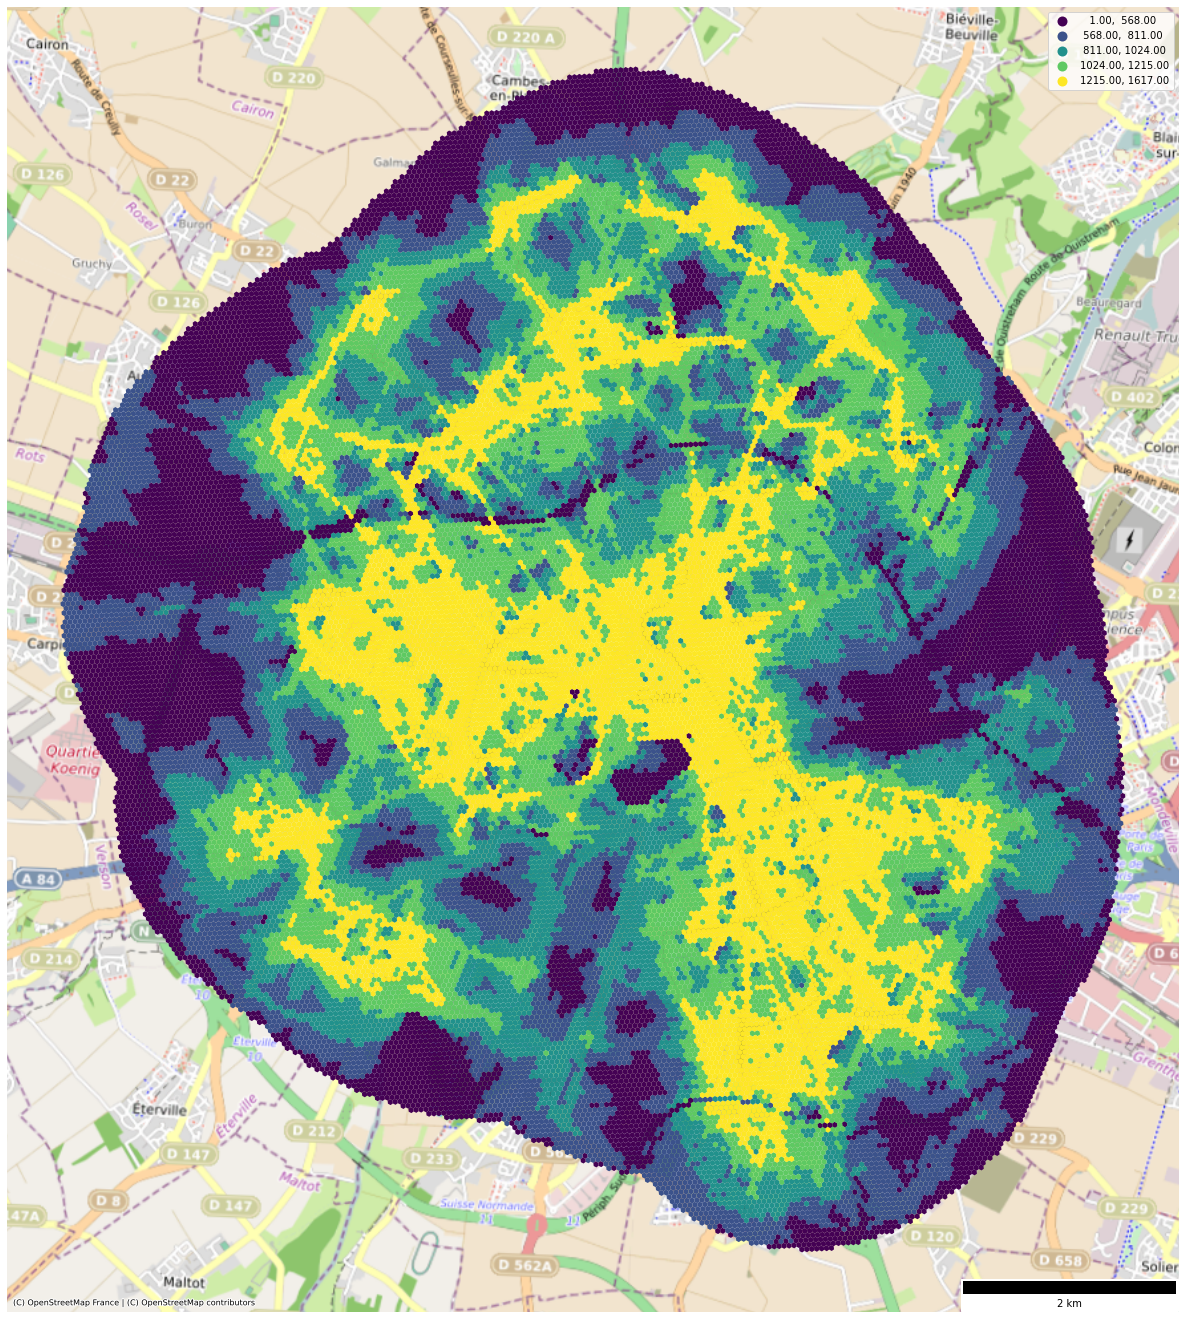

In [7]:
f, ax = plt.subplots(1, figsize=(24,24))
ax = access_score.to_crs(local_crs).plot(ax = ax, 
                                         column = 'Freq',
                                         scheme = 'quantiles',
                                         classification_kwds={'bins':[300,450, 600,700]},
                                         legend = True)

ax.tick_params(labelsize = 20)

cx.add_basemap(ax,
               crs=local_crs,
               source = cx.providers.OpenStreetMap.France)

ax.set_axis_off()


scalebar = ScaleBar(dx=1,
                    location=(4),
                    height_fraction=0.01
                    )
ax.add_artist(scalebar)

fig = ax.figure
cb_ax = fig.axes[0]
cb_ax.tick_params(labelsize=20)

#plt.savefig('./figures/access_score_adults.png', bbox_inches='tight')

In [27]:
from ipyleaflet import Map, basemaps, basemap_to_tiles, SplitMapControl

m = Map(center=(49.18293907997725, -0.370694548590918), zoom=5)

right_layer = basemap_to_tiles(basemaps.NASAGIBS.ModisTerraTrueColorCR, "2017-11-11")
left_layer = basemap_to_tiles(basemaps.NASAGIBS.ModisAquaBands721CR, "2017-11-11")

control = SplitMapControl(left_layer=left_layer, right_layer=right_layer)
m.add_control(control)

m

Map(center=[49.18293907997725, -0.370694548590918], controls=(ZoomControl(options=['position', 'zoom_in_text',…

In [17]:
from ipyleaflet import Map, basemaps, basemap_to_tiles, SplitMapControl
from ipyleaflet import Map, LocalTileLayer
from ipyleaflet import Map, GeoJSON, GeoData

In [24]:
geo_data = GeoData(geo_dataframe = access_score)
geo_data2 = GeoData(geo_dataframe = access_score)

In [20]:
m = Map(center = (49.18293907997725, -0.370694548590918), zoom=9)
m.add_layer(geo_data)
m

Map(center=[49.18293907997725, -0.370694548590918], controls=(ZoomControl(options=['position', 'zoom_in_text',…

In [ ]:
geo_data.head()

In [26]:
from ipyleaflet import Map, basemaps, basemap_to_tiles, SplitMapControl

m = Map(center=(49.18293907997725, -0.370694548590918), zoom=15)

#m.add_layer(LocalTileLayer(path='./figures/access_score_adults.png'))

right_layer = geo_data
left_layer = LocalTileLayer(path='./figures/access_score_adults.png')

control = SplitMapControl(left_layer=left_layer, right_layer=right_layer)
m.add_control(control)

m

Map(center=[49.18293907997725, -0.370694548590918], controls=(ZoomControl(options=['position', 'zoom_in_text',…